# DATA CLEANING PROCESS

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder , StandardScaler , MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline , make_pipeline 
import warnings 
warnings.filterwarnings('ignore')

# Importing File

In [2]:
data = pd.read_csv('C:\\Users\\ASUS\\OneDrive\\Desktop\\Assignment\\Data\\Coldplay.csv')

In [3]:
data.head()

,name,duration,release_date,album_name,explicit,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,🪐,53.184,2021-10-15,Music Of The Spheres,False,62,0.887000,0.3260,0.322,0.841000,0.116,-20.192,0.0337,89.657,4,0.0651
1,Higher Power,206.681,2021-10-15,Music Of The Spheres,False,71,0.006430,0.5070,0.832,0.000016,0.229,-5.931,0.0425,177.894,4,0.4850
2,Humankind,266.704,2021-10-15,Music Of The Spheres,False,68,0.000172,0.5750,0.838,0.000103,0.458,-6.498,0.0454,135.006,4,0.2150
3,✨,53.033,2021-10-15,Music Of The Spheres,False,59,0.805000,0.0859,0.289,0.990000,0.141,-17.240,0.0359,166.784,4,0.0380
4,Let Somebody Go,241.595,2021-10-15,Music Of The Spheres,False,76,0.193000,0.5920,0.342,0.002450,0.110,-8.930,0.0339,130.953,4,0.1550


#  Checking DTypes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              232 non-null    object 
 1   duration          232 non-null    float64
 2   release_date      232 non-null    object 
 3   album_name        232 non-null    object 
 4   explicit          232 non-null    bool   
 5   popularity        232 non-null    int64  
 6   acousticness      232 non-null    float64
 7   danceability      232 non-null    float64
 8   energy            232 non-null    float64
 9   instrumentalness  232 non-null    float64
 10  liveness          232 non-null    float64
 11  loudness          232 non-null    float64
 12  speechiness       232 non-null    float64
 13  tempo             232 non-null    float64
 14  time_signature    232 non-null    int64  
 15  valence           232 non-null    float64
dtypes: bool(1), float64(10), int64(2), object(3)

#  Changing DType of ['release_date']

In [5]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              232 non-null    object        
 1   duration          232 non-null    float64       
 2   release_date      232 non-null    datetime64[ns]
 3   album_name        232 non-null    object        
 4   explicit          232 non-null    bool          
 5   popularity        232 non-null    int64         
 6   acousticness      232 non-null    float64       
 7   danceability      232 non-null    float64       
 8   energy            232 non-null    float64       
 9   instrumentalness  232 non-null    float64       
 10  liveness          232 non-null    float64       
 11  loudness          232 non-null    float64       
 12  speechiness       232 non-null    float64       
 13  tempo             232 non-null    float64       
 14  time_signature    232 non-

In [7]:
data.describe()

,duration,release_date,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,232.000000,232,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,262.262586,2012-10-07 06:18:37.241379328,43.362069,0.242882,0.388537,0.622547,0.206304,0.402314,-8.716358,0.046014,122.630185,3.849138,0.233402
min,21.388000,2000-07-10 00:00:00,0.000000,0.000089,0.071400,0.049100,0.000000,0.035900,-29.286000,0.024300,64.501000,1.000000,0.018500
25%,225.183000,2008-11-24 00:00:00,23.000000,0.006667,0.280750,0.455500,0.000594,0.123000,-9.362250,0.031900,102.839000,4.000000,0.130750
50%,261.773000,2013-08-19 00:00:00,44.000000,0.046850,0.405500,0.670500,0.016700,0.288500,-7.520000,0.036800,126.618000,4.000000,0.209000
75%,303.259500,2018-12-07 00:00:00,59.000000,0.433250,0.491000,0.805250,0.345250,0.725250,-6.526000,0.048100,138.015000,4.000000,0.303000
max,617.057000,2021-10-15 00:00:00,91.000000,0.990000,0.806000,0.971000,0.993000,0.994000,-3.516000,0.248000,204.520000,5.000000,0.802000
std,90.885502,NaN,21.115800,0.326769,0.143816,0.225704,0.319071,0.326351,3.782933,0.029751,27.007414,0.463937,0.144770


#  Making Different Columns Of ['release_year'] , ['release_month_no'] , ['release_month_name'] , ['release_day']

In [8]:
data['release_year'] = data['release_date'].dt.year

In [9]:
data['release_month_no'] = data['release_date'].dt.month

In [10]:
data['release_month_name'] = data['release_date'].dt.month_name()

In [11]:
data['release_day'] = data['release_date'].dt.day

#  Checking Null Values

In [12]:
data.isnull().sum()

name                  0
duration              0
release_date          0
album_name            0
explicit              0
popularity            0
acousticness          0
danceability          0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
tempo                 0
time_signature        0
valence               0
release_year          0
release_month_no      0
release_month_name    0
release_day           0
dtype: int64

In [13]:
data.sample(3)

,name,duration,release_date,album_name,explicit,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,release_year,release_month_no,release_month_name,release_day
75,Army of One,376.826,2015-12-04,A Head Full of Dreams,False,58,0.27500,0.387,0.659,0.000064,0.0861,-6.492,0.0434,146.048,4,0.287,2015,12,December,4
27,Everyday Life,258.533,2019-11-22,Everyday Life,False,29,0.77500,0.512,0.452,0.081800,0.0650,-8.991,0.0292,124.103,4,0.235,2019,11,November,22
60,Hymn for the Weekend - Live,222.146,2018-12-07,Love in Tokyo,False,12,0.00451,0.416,0.769,0.019200,0.9100,-6.703,0.0409,90.034,4,0.413,2018,12,December,7


# Dropping Columns That Are Not Necessary

In [14]:
columns_to_drop = [
    'name',              
    'release_date',       
    'album_name',           
    'release_month_name',           
]


In [15]:
renewed_data = data.drop(columns = columns_to_drop)

In [16]:
renewed_data.sample(3)

,duration,explicit,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,release_year,release_month_no,release_day
12,151.093,False,27,0.939,0.146,0.216,0.540,0.0773,-12.302,0.0399,78.045,4,0.0341,2019,11,22
74,111.853,False,54,0.964,0.288,0.285,0.897,0.4060,-18.193,0.0355,127.122,4,0.1480,2015,12,4
19,155.000,False,14,0.921,0.141,0.280,0.368,0.1350,-18.225,0.0618,64.501,4,0.4340,2019,11,22


#  Checking Outliers Using Boxplot

<Axes: xlabel='duration'>

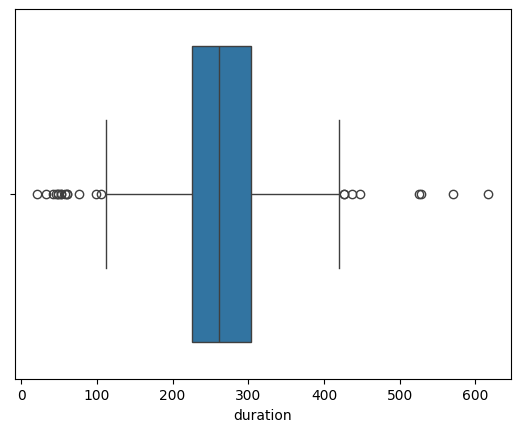

In [17]:
sns.boxplot(x = renewed_data['duration'])

<Axes: xlabel='popularity'>

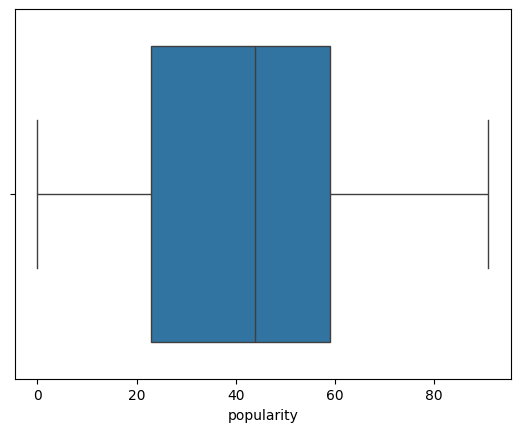

In [18]:
sns.boxplot(x = renewed_data['popularity'])

<Axes: xlabel='acousticness'>

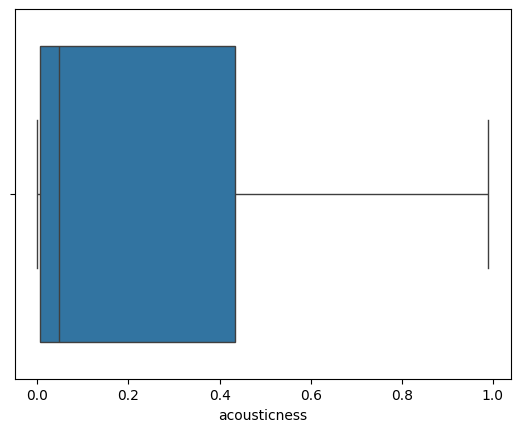

In [19]:
sns.boxplot(x = renewed_data['acousticness'])

<Axes: xlabel='danceability'>

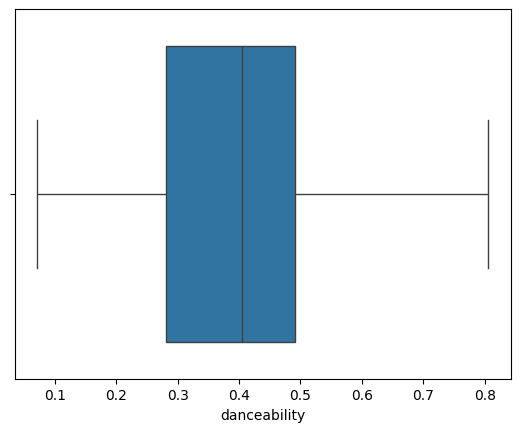

In [20]:
sns.boxplot(x = renewed_data['danceability'])

<Axes: xlabel='energy'>

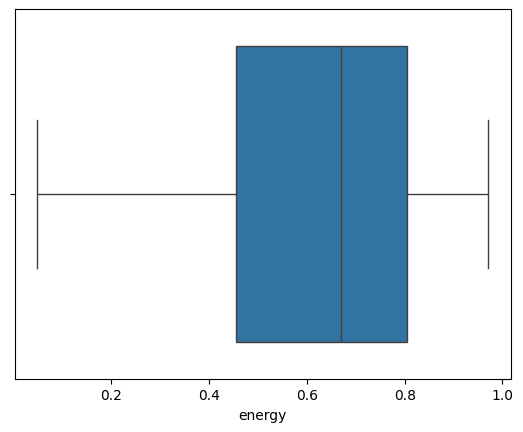

In [21]:
sns.boxplot(x = renewed_data['energy'])

<Axes: xlabel='instrumentalness'>

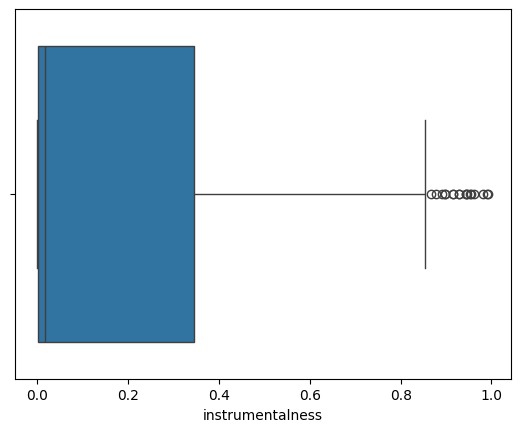

In [22]:
sns.boxplot(x = renewed_data['instrumentalness'])

<Axes: xlabel='liveness'>

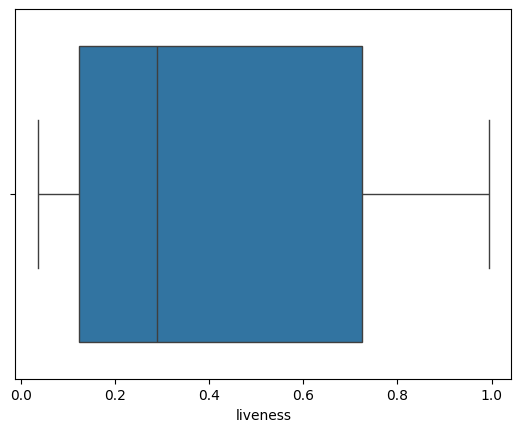

In [23]:
sns.boxplot(x = renewed_data['liveness'])

<Axes: xlabel='loudness'>

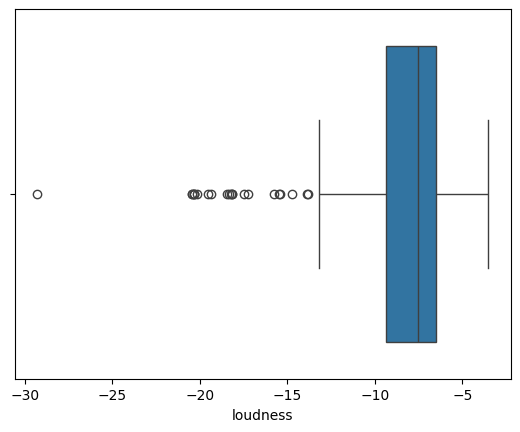

In [24]:
sns.boxplot(x = renewed_data['loudness'])

<Axes: xlabel='speechiness'>

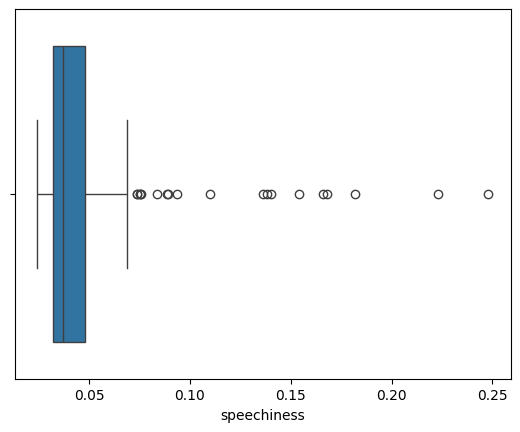

In [25]:
sns.boxplot(x = renewed_data['speechiness'])

<Axes: xlabel='tempo'>

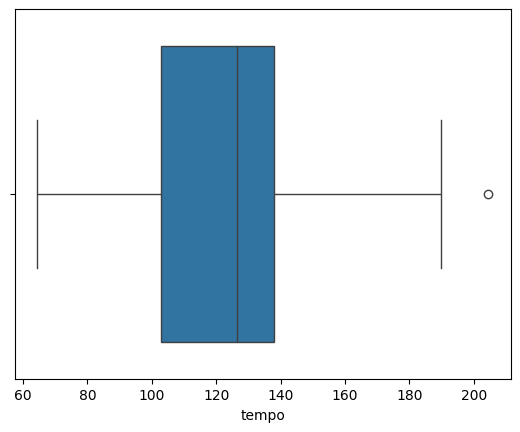

In [26]:
sns.boxplot(x = renewed_data['tempo'])

<Axes: xlabel='time_signature'>

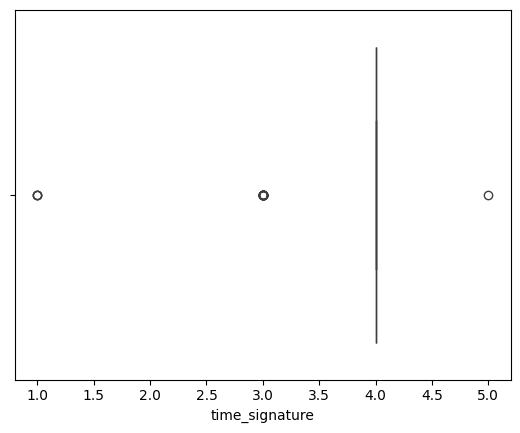

In [27]:
sns.boxplot(x = renewed_data['time_signature'])

<Axes: xlabel='valence'>

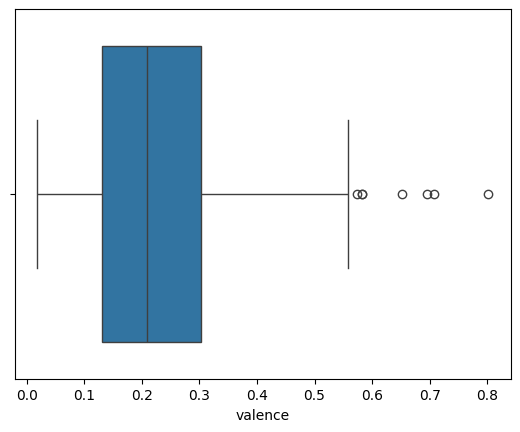

In [28]:
sns.boxplot(x = renewed_data['valence'])

#  Check The IQR Of    " renewed_data['duration'] "

In [29]:
Q1 = renewed_data['duration'].quantile(0.25)
Q3 = renewed_data['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter Out The Outliers


In [30]:
filtered_data = renewed_data[(renewed_data['duration'] >= lower_bound) & (renewed_data['duration'] <= upper_bound)]


<Axes: xlabel='duration'>

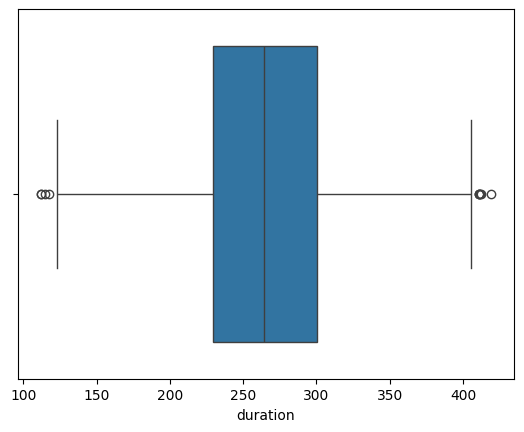

In [31]:
sns.boxplot(x = filtered_data['duration'])

# Check The IQR Of " renewed_data['instrumentalness'] "

In [32]:
Q1 = renewed_data['instrumentalness'].quantile(0.25)
Q3 = renewed_data['instrumentalness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  Filter Out The Outliers 

In [33]:
filtered_data = renewed_data[(renewed_data['instrumentalness'] >= lower_bound) & (renewed_data['instrumentalness'] <= upper_bound)]


<Axes: xlabel='instrumentalness'>

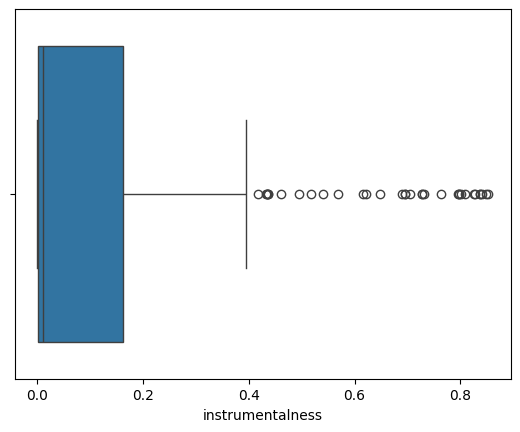

In [34]:
sns.boxplot(x = filtered_data['instrumentalness'])

In [35]:
filtered_data.shape

(214, 16)

In [36]:
renewed_data.shape

(232, 16)

In [37]:
data.shape

(232, 20)

# Check The IQR Of " renewed_data['loudness'] "

In [38]:
Q1 = renewed_data['loudness'].quantile(0.25)
Q3 = renewed_data['loudness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter Out The Outliers

In [39]:
filtered_data = renewed_data[(renewed_data['loudness'] >= lower_bound) & (renewed_data['loudness'] <= upper_bound)]


<Axes: xlabel='loudness'>

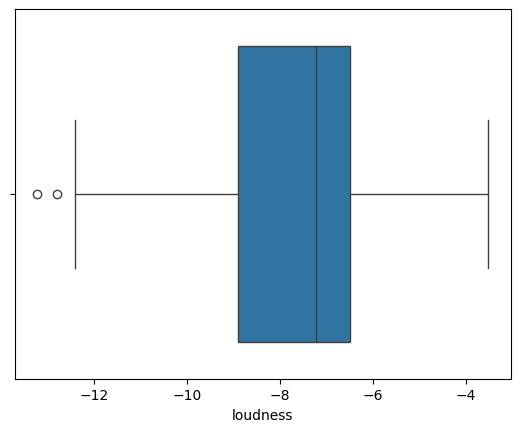

In [40]:
sns.boxplot(x = filtered_data['loudness'])

# Check The IQR Of " renewed_data['speechiness'] "

In [41]:
Q1 = renewed_data['speechiness'].quantile(0.25)
Q3 = renewed_data['speechiness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter Out The Outliers

In [42]:
filtered_data = renewed_data[(renewed_data['speechiness'] >= lower_bound) & (renewed_data['speechiness'] <= upper_bound)]


<Axes: xlabel='speechiness'>

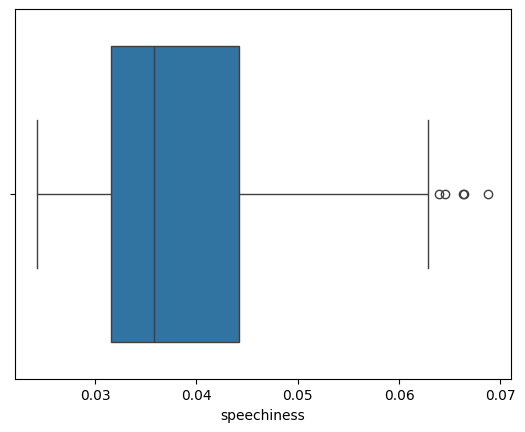

In [43]:
sns.boxplot(x = filtered_data['speechiness'])

# Check The IQR Of " renewed_data['tempo'] "

In [44]:
Q1 = renewed_data['tempo'].quantile(0.25)
Q3 = renewed_data['tempo'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter Out The Outliers

In [45]:
filtered_data = renewed_data[(renewed_data['tempo'] >= lower_bound) & (renewed_data['tempo'] <= upper_bound)]


<Axes: xlabel='tempo'>

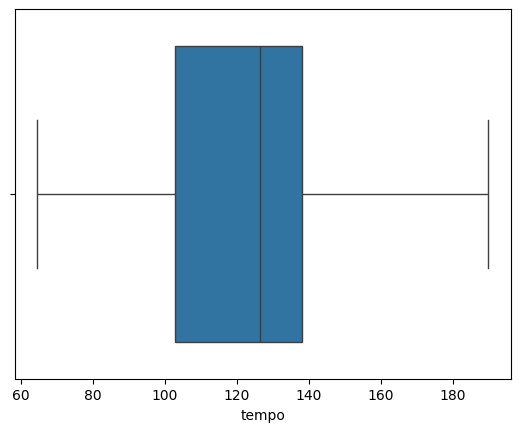

In [46]:
sns.boxplot(x = filtered_data['tempo'])

# Check The IQR Of " renewed_data['time_signature'] "

In [47]:
Q1 = renewed_data['time_signature'].quantile(0.25)
Q3 = renewed_data['time_signature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter Out The Outliers

In [48]:
filtered_data = renewed_data[(renewed_data['time_signature'] >= lower_bound) & (renewed_data['time_signature'] <= upper_bound)]


<Axes: xlabel='time_signature'>

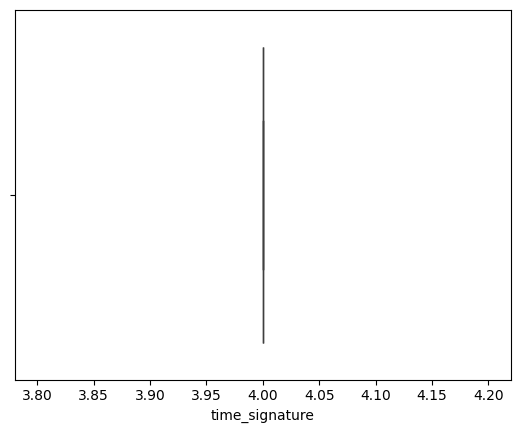

In [49]:
sns.boxplot(x = filtered_data['time_signature'])

# Check The IQR Of " renewed_data['valence'] "

In [50]:
Q1 = renewed_data['valence'].quantile(0.25)
Q3 = renewed_data['valence'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter Out The Outliers

In [51]:
filtered_data = renewed_data[(renewed_data['valence'] >= lower_bound) & (renewed_data['valence'] <= upper_bound)]


<Axes: xlabel='valence'>

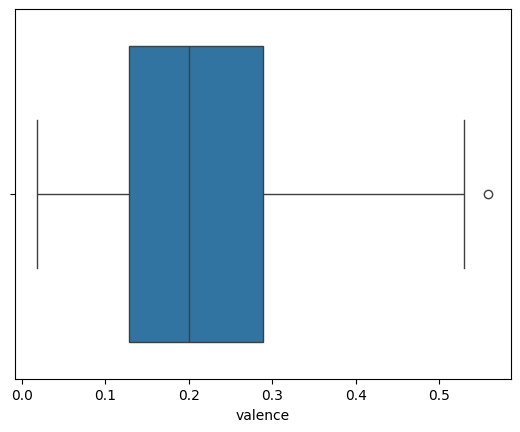

In [52]:
sns.boxplot(x = filtered_data['valence'])

#  Checking The Shape Of data , renewed_data and filtered_data

In [53]:
data.shape

(232, 20)

In [54]:
renewed_data.shape

(232, 16)

In [55]:
filtered_data.shape

(225, 16)

In [57]:
filtered_data.sample(3)

,duration,explicit,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,release_year,release_month_no,release_day
163,242.373,False,34,0.09540,0.486,0.617,0.000003,0.109,-7.115,0.0287,138.015,4,0.4170,2008,11,24
139,137.819,False,50,0.73100,0.216,0.395,0.016700,0.338,-11.791,0.0361,83.697,3,0.2060,2011,10,24
46,369.306,False,50,0.00262,0.196,0.937,0.000002,0.397,-5.813,0.1380,124.401,4,0.0819,2018,12,7
